#Q1

Hierarchical Clustering:
Hierarchical clustering is a type of clustering algorithm that builds a hierarchy of clusters. It starts by treating each data point as a separate cluster and then merges the closest clusters iteratively until only one cluster remains. The result is a tree-like structure called a dendrogram, representing the relationships between data points and clusters.

Difference from Other Clustering Techniques:
Hierarchical clustering differs from other clustering techniques, such as k-means, in that it doesn't require specifying the number of clusters beforehand. It also provides a more detailed view of the relationships between clusters through the dendrogram.

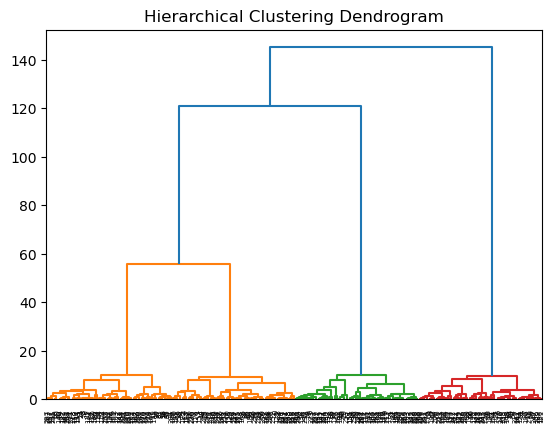

In [1]:
#1
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Hierarchical clustering
agg_cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(X)

# Plot the dendrogram
linked = linkage(X, 'ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

#Q2
Two Main Types of Hierarchical Clustering Algorithms:

Agglomerative Hierarchical Clustering: It starts with each data point as a separate cluster and merges the closest clusters until only one cluster remains.

Divisive Hierarchical Clustering: It starts with all data points in a single cluster and recursively divides them into smaller clusters until each data point is in its cluster.

In [4]:
#2
# Agglomerative Hierarchical Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3).fit(X)

# Divisive Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances_argmin_min

def divisive_hierarchical_clustering(X, n_clusters):
    n_samples, _ = X.shape
    labels = np.zeros(n_samples)

    # Initialize with agglomerative clustering
    agg_cluster = AgglomerativeClustering(n_clusters=n_clusters).fit(X)

    for i in range(n_clusters):
        cluster_points = np.where(agg_cluster.labels_ == i)[0]
        sub_X = X[cluster_points, :]

        # Further cluster the points within each agglomerative cluster
        sub_agg_cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(sub_X)
        sub_labels = sub_agg_cluster.labels_

        # Assign sub-cluster labels
        labels[cluster_points] = sub_labels + max(labels) + 1

    return labels

# Perform divisive hierarchical clustering
divisive_labels = divisive_hierarchical_clustering(X, n_clusters=3)

#Q3
Cluster Distance in Hierarchical Clustering:

The distance between two clusters is a crucial aspect of hierarchical clustering. Common distance metrics include Euclidean distance, Manhattan distance, and linkage methods like Ward's method.

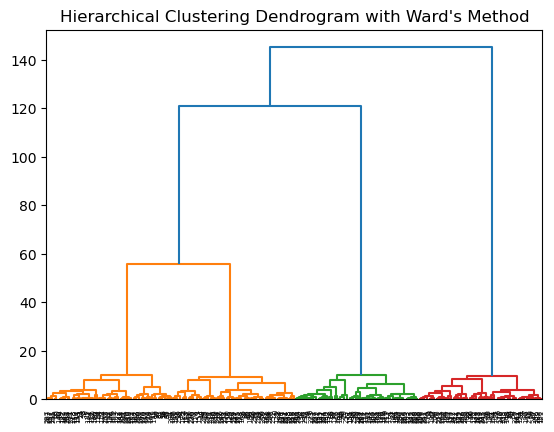

In [5]:
#3
from scipy.cluster.hierarchy import dendrogram, linkage

# Calculate linkage matrix using Ward's method
linked = linkage(X, 'ward')

# Plot the dendrogram
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram with Ward\'s Method')
plt.show()

#Q4
Determining Optimal Number of Clusters:

Common methods include examining the dendrogram, using the cophenetic correlation coefficient, and applying metrics like the silhouette score or the Davies-Bouldin index.

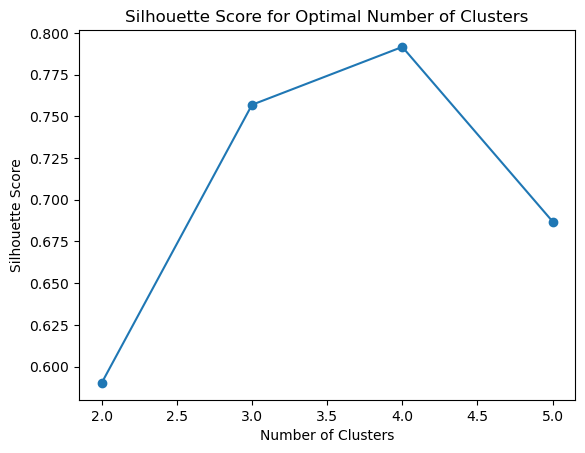

In [6]:
#4
from sklearn.metrics import silhouette_score

# Evaluate silhouette scores for different numbers of clusters
silhouette_scores = []
for n_clusters in range(2, 6):
    agg_cluster = AgglomerativeClustering(n_clusters=n_clusters).fit(X)
    silhouette_scores.append(silhouette_score(X, agg_cluster.labels_))

# Plot silhouette scores
plt.plot(range(2, 6), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.show()

#Q5
A dendrogram is a tree-like diagram used to represent the hierarchical structure of clusters in hierarchical clustering. In hierarchical clustering, data points are grouped based on their similarity, and the dendrogram visually displays the relationships between these groups.

Here's a brief explanation of how dendrograms work and their utility in analyzing hierarchical clustering results:

Tree Structure: A dendrogram is constructed as a tree structure, where each leaf node represents an individual data point, and internal nodes represent clusters of data points. The height of the branches in the tree represents the distance at which clusters are merged.

Branch Height: The height at which two clusters merge in the dendrogram indicates their dissimilarity. The longer the vertical line connecting two branches, the less similar the clusters are.

Cutting the Dendrogram: Analysts can cut the dendrogram at a certain height to obtain a specific number of clusters. This cutting point determines the granularity of the final clusters.

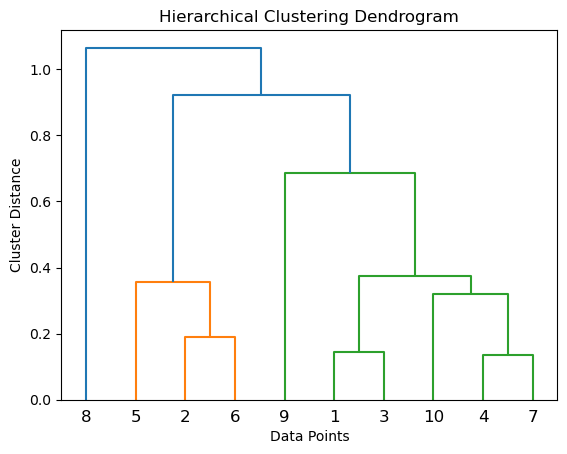

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate sample data
np.random.seed(0)
data = np.random.rand(10, 2)

# Perform hierarchical clustering
linkage_matrix = linkage(data, method='ward')

# Plot the dendrogram
dendrogram(linkage_matrix, labels=range(1, 11))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Cluster Distance')
plt.show()

#Q6
Yes, hierarchical clustering can be used for both numerical and categorical data. However, the distance metrics used for numerical and categorical data are different due to the nature of the data types.

#Numerical Data:
For numerical data, commonly used distance metrics include Euclidean distance, Manhattan distance, and Pearson correlation. Here's an example using Euclidean distance with the iris dataset:

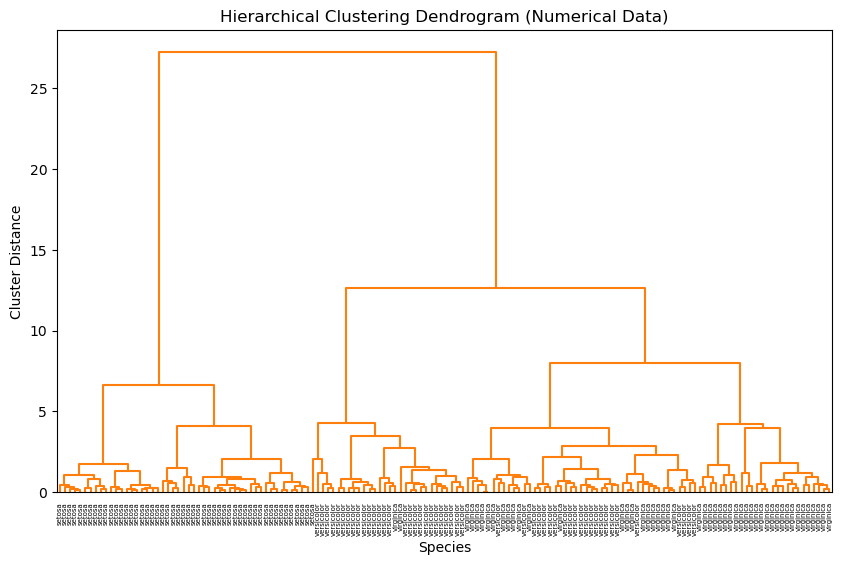

In [8]:
#6
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load iris dataset
iris = load_iris()
data_num = iris.data

# Standardize the numerical data
scaler = StandardScaler()
data_num_scaled = scaler.fit_transform(data_num)

# Perform hierarchical clustering with Euclidean distance
linkage_matrix_num = linkage(data_num_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix_num, labels=iris.target_names[iris.target], orientation='top', color_threshold=np.inf)
plt.title('Hierarchical Clustering Dendrogram (Numerical Data)')
plt.xlabel('Species')
plt.ylabel('Cluster Distance')
plt.show()

#Categorical Data:
For categorical data, Gower's distance or Jaccard distance are often used. Gower's distance considers both numerical and categorical features and is suitable for mixed-type data. Here's an example using the famous "Iris" dataset with a categorical feature added:

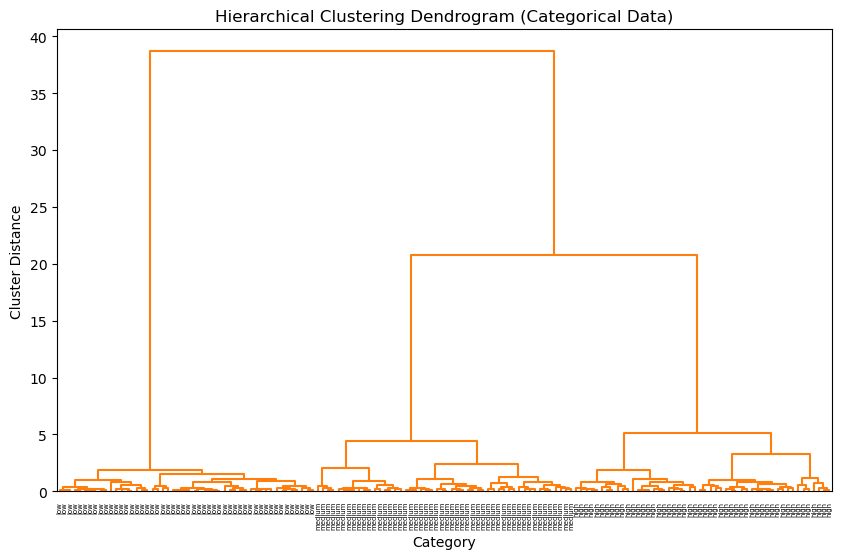

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris
from gower import gower_matrix
import warnings 
warnings.filterwarnings('ignore')
# Load iris dataset
iris = load_iris()
data_num = iris.data

# Add a categorical feature to the iris dataset
data_cat = pd.DataFrame(data_num, columns=iris.feature_names)
data_cat['Category'] = pd.cut(iris.target, bins=[-0.1, 0.9, 1.9, 2.9], labels=['low', 'medium', 'high']).astype(str)

# Calculate Gower's distance using the gower package
gower_dist = gower_matrix(data_cat)

# Perform hierarchical clustering
linkage_matrix_cat = linkage(gower_dist, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix_cat, labels=data_cat['Category'].values, orientation='top', color_threshold=np.inf)
plt.title('Hierarchical Clustering Dendrogram (Categorical Data)')
plt.xlabel('Category')
plt.ylabel('Cluster Distance')
plt.show()

#Q7
Hierarchical clustering can be used to identify outliers or anomalies in your data by examining the structure of the dendrogram. Outliers may appear as individual data points or small clusters with distinct branches. The height at which a data point or small cluster is merged into the larger structure can indicate its dissimilarity or uniqueness.

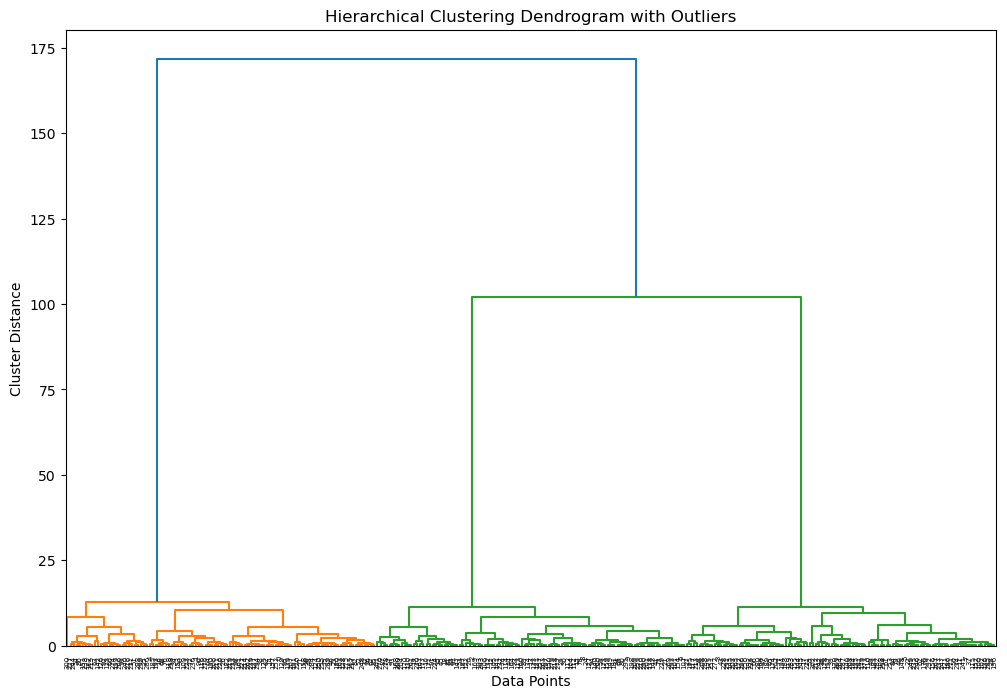

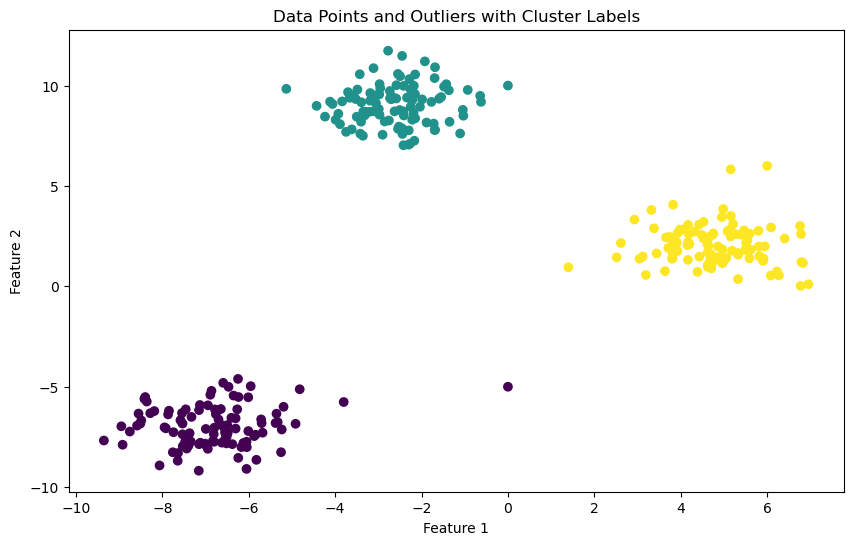

In [4]:
#7
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import make_blobs

# Generate synthetic data with outliers
data, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)
outliers = np.array([[0, -5], [0, 10], [6, 6]])

# Add outliers to the data
data_with_outliers = np.vstack([data, outliers])

# Perform hierarchical clustering
linkage_matrix = linkage(data_with_outliers, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram with Outliers')
plt.xlabel('Data Points')
plt.ylabel('Cluster Distance')
plt.show()

# Cut the dendrogram to identify clusters
num_clusters = 3  # Adjust as needed
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Visualize the data points and outliers with cluster labels
plt.figure(figsize=(10, 6))
plt.scatter(data_with_outliers[:, 0], data_with_outliers[:, 1], c=clusters, cmap='viridis')
plt.title('Data Points and Outliers with Cluster Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()